In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import re
import ast

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.head()

url                 title  \
0  https://aeon.co/essays/intellectual-life-is-st...  A metropolitan world   
1  https://aeon.co/essays/why-is-simplicity-so-un...  Why simplicity works   
2  https://aeon.co/essays/how-bad-experiences-in-...  Childhood, disrupted   
3  https://aeon.co/essays/an-enigmatic-spider-and...    Webs of perception   
4  https://aeon.co/essays/why-should-science-have...        Who knows what   

                                             content  \
0  At some unknown moment between 2010 and 2015, ...   
1  It’s May 1964 and, on a low hillside in New Je...   
2  If you saw Laura walking down the New York Cit...   
3  A few years ago a message from God was found i...   
4  Whenever we try to make an inventory of humank...   

                                                tags        date  
0  ["['Cities'", " 'Demography and migration'", "...  2018-04-24  
1  ["['Physics'", " 'Evolution'", " 'Philosophy o...  2021-10-11  
2  ["['Childhood and adolescence'", " 'Illness an...  2015-07-07  
3  ["['Cognition and intelligence'", " 'Evolution...  2012-09-25  
4  ["['Philosophy of science'", " 'History of ide...  2012-10-08

In [6]:
## Basic overview

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      2416 non-null   object
 1   title    2416 non-null   object
 2   content  2416 non-null   object
 3   tags     2416 non-null   object
 4   date     2416 non-null   object
dtypes: object(5)
memory usage: 94.5+ KB


In [21]:
## Number of unique tags

In [18]:
df['tags']

0       ["['Cities'", " 'Demography and migration'", "...
1       ["['Physics'", " 'Evolution'", " 'Philosophy o...
2       ["['Childhood and adolescence'", " 'Illness an...
3       ["['Cognition and intelligence'", " 'Evolution...
4       ["['Philosophy of science'", " 'History of ide...
                              ...                        
2411    ["['Gender and identity'", " 'Neuroscience'", ...
2412    ["['History'", " 'Mental health'", " 'Psychiat...
2413    ["['Ageing and death'", " 'Human rights and ju...
2414    ["['Dance and theatre'", " 'Meaning and the go...
2415    ["['Philosophy of mind'", " 'Metaphysics'", " ...
Name: tags, Length: 2416, dtype: object

In [5]:
def clean_tags(tag):
    matches = re.findall(r"'(.*?)'", tag)
    return matches

In [6]:
df['tags'] = df['tags'].apply(clean_tags)

In [7]:
tags = df['tags'].explode().unique()
print(f"There are {len(tags)} unique tags in the data")

print(f"They are {tags}")

There are 114 unique tags in the data
They are ['Cities' 'Demography and migration' 'Global history' 'Physics'
 'Evolution' 'Philosophy of science' 'Childhood and adolescence'
 'Illness and disease' 'Mental health' 'Wellbeing'
 'Cognition and intelligence' 'Philosophy of mind' 'History of ideas'
 'Knowledge' 'Biology' 'History of science' 'Sleep and dreams'
 'Animals and humans' 'Self-improvement' 'Psychiatry and psychotherapy'
 'Thinkers and theories' 'History' 'Gender' 'Human rights and justice'
 'Family life' 'Human reproduction' 'Neuroscience' 'War and peace'
 'Archaeology' 'Anthropology' 'Human evolution' 'Nations and empires'
 'Political philosophy' 'Politics and government'
 'Consciousness and altered states' 'Religion' 'Architecture'
 'The environment' 'Work' 'Technology and the self' 'The future'
 'Future of technology' 'Fairness and equality' 'Film and visual culture'
 'Biography and memoir' 'Deep time' 'Nature and landscape' 'Palaeontology'
 'Stories and literature' 'Mood an

In [32]:
df['tags'].explode().value_counts().head(20)

tags
History of ideas                      210
Stories and literature                210
Thinkers and theories                 190
History                               173
Politics and government               168
Human rights and justice              166
Ethics                                158
Values and beliefs                    152
History of science                    149
Political philosophy                  142
Neuroscience                          124
Biology                               118
The environment                       116
Cognition and intelligence            111
War and peace                         106
Nations and empires                   103
Ecology and environmental sciences     99
Religion                               97
Biography and memoir                   97
Evolution                              94
Name: count, dtype: int64

In [34]:
df['tags'].explode().value_counts().tail(20)

tags
Home                       25
Oceans and water           25
Making                     25
Life stages                25
Environmental history      24
Logic and probability      24
Cosmopolitanism            23
Comparative philosophy     23
Neurodiversity             21
Human reproduction         19
Ageing and death           18
Dance and theatre          17
Complexity                 17
Automation and robotics    16
Addiction                  15
Design and fashion         14
Engineering                13
Biotechnology              12
Palaeontology               9
Chemistry                   6
Name: count, dtype: int64

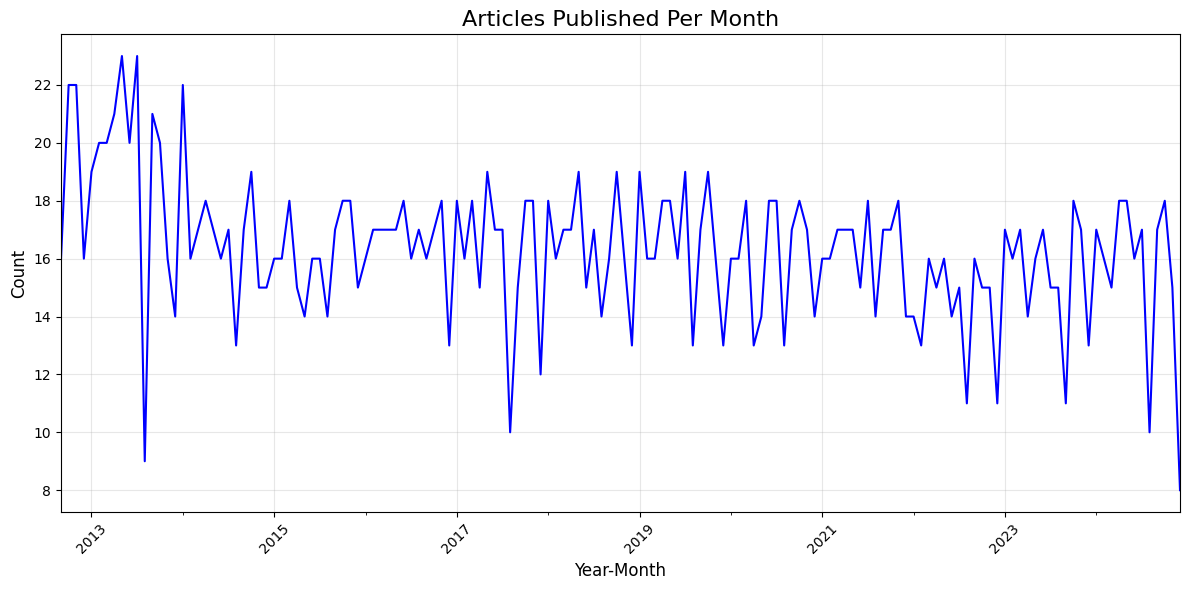

In [8]:
df['date'] = pd.to_datetime(df['date'])

df['year_month'] = df['date'].dt.to_period('M')

monthly_counts = df['year_month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='line', color='blue', linestyle='-')
plt.title('Articles Published Per Month', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
### Title

In [42]:
title_text = ' '.join(df['title'].str.lower())

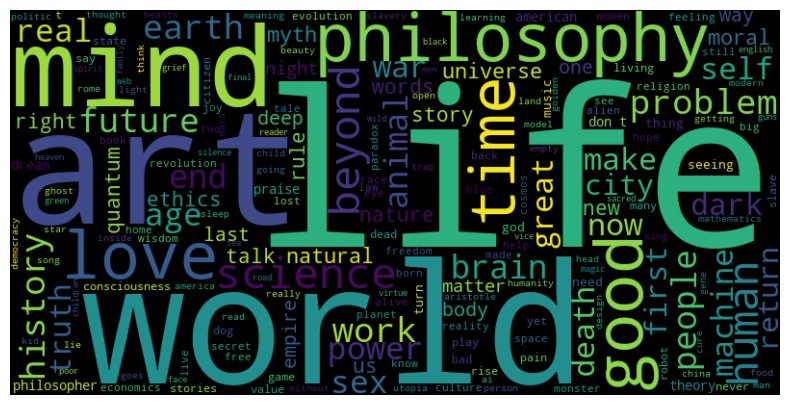

In [50]:
wordcloud = WordCloud(
    width=800, 
    height=400, 
    colormap="viridis", 
    stopwords=None  
).generate(title_text.replace("’s", ''))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") 
plt.show()

In [7]:
df['char_len'] = df['content'].apply(len)
df['word_len'] = df['content'].apply(lambda x: len(x.split()))

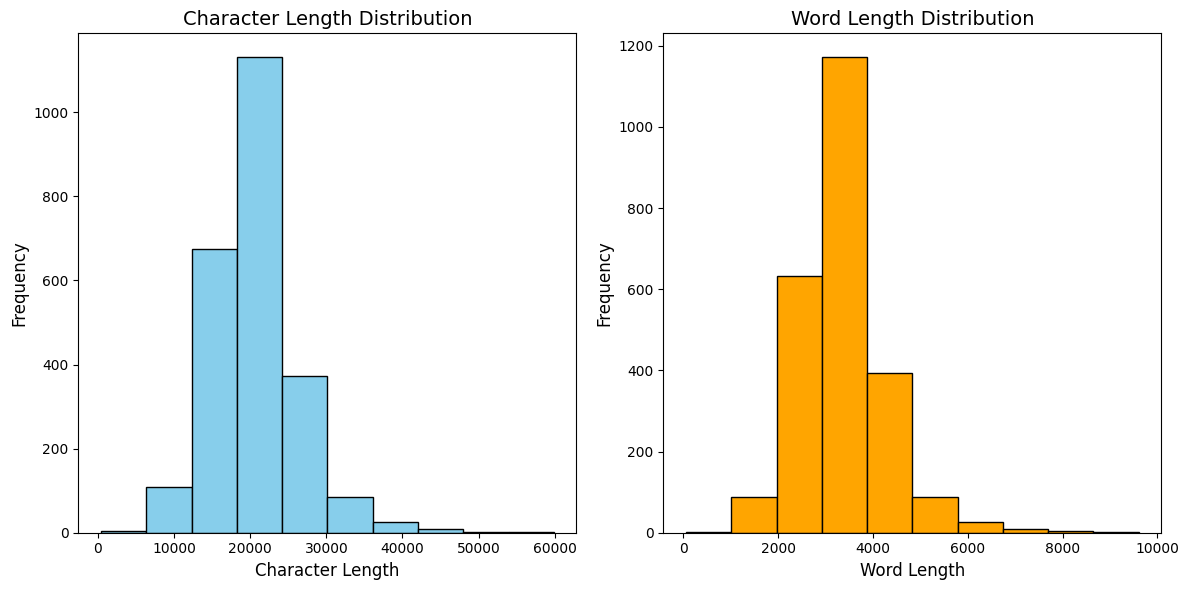

In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['char_len'], bins=10, color='skyblue', edgecolor='black')
plt.title('Character Length Distribution', fontsize=14)
plt.xlabel('Character Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1, 2, 2)
plt.hist(df['word_len'], bins=10, color='orange', edgecolor='black')
plt.title('Word Length Distribution', fontsize=14)
plt.xlabel('Word Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

In [9]:
df[df['word_len'] > 9000]

url                 title  \
775  https://aeon.co/essays/why-isis-has-the-potent...  ISIS is a revolution   
924  https://aeon.co/essays/will-we-ever-understand...      In the beginning   

                                               content  \
775  As pundits and politicians stoked the recent s...   
924  One crisp day last March, Harvard professor Jo...   

                                                  tags       date year_month  \
775  [Values and beliefs, Politics and government, ... 2015-12-15    2015-12   
924  [Astronomy, Cosmology, Deep time, Philosophy o... 2015-05-12    2015-05   

     char_len  word_len  
775     59872      9605  
924     55066      9173

In [93]:
# Cleaning the content

In [9]:
# pip install contractions
import contractions

In [10]:
def expand_words(text):
    return contractions.fix(text)
df['content'] =  df['content'].apply(expand_words)

In [11]:
def remove_punctuations(text):
    spaced_punc = "!#$%‘&\()*+,-./:;<=>?@[\\]^_`{|}~…"
    non_spaced_punc = "’\""

    text = text.translate(str.maketrans(spaced_punc, ' ' * len(spaced_punc)))
    text = text.translate(str.maketrans('', '', non_spaced_punc))
    
    return text

def remove_stopwords(text):
    tokens = word_tokenize(text)    
    stop_words = set(stopwords.words('english'))
    cleaned_tokens = [word for word in tokens if word.lower() not in stop_words]
    
    return ' '.join(cleaned_tokens)

def clean_data(text):
    text = remove_punctuations(text)
    text = remove_stopwords(text)
    
    return text.lower()

In [12]:
cleaned_content = df['content'].apply(clean_data)

In [13]:
content_text = ' '.join(cleaned_content)

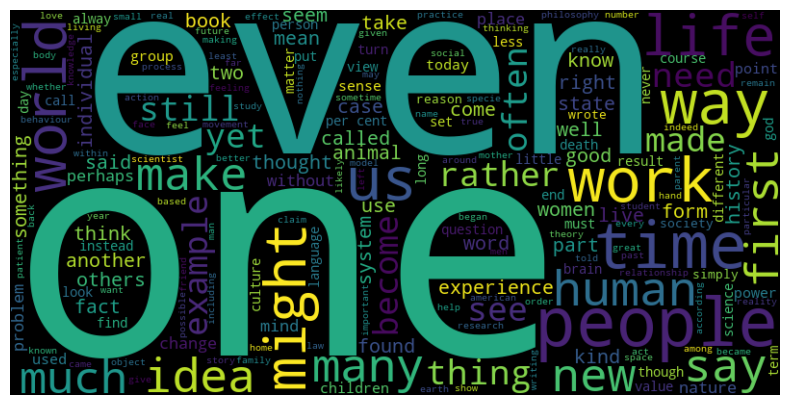

In [14]:
wordcloud = WordCloud(
    width=800, 
    height=400, 
    colormap="viridis", 
    stopwords=None  
).generate(content_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") 
plt.show()

In [13]:
vectorizer = TfidfVectorizer()
tfidf_matrix  = vectorizer.fit_transform(cleaned_content)

In [14]:
terms = vectorizer.get_feature_names_out()

In [15]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

In [44]:
# words

In [16]:
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

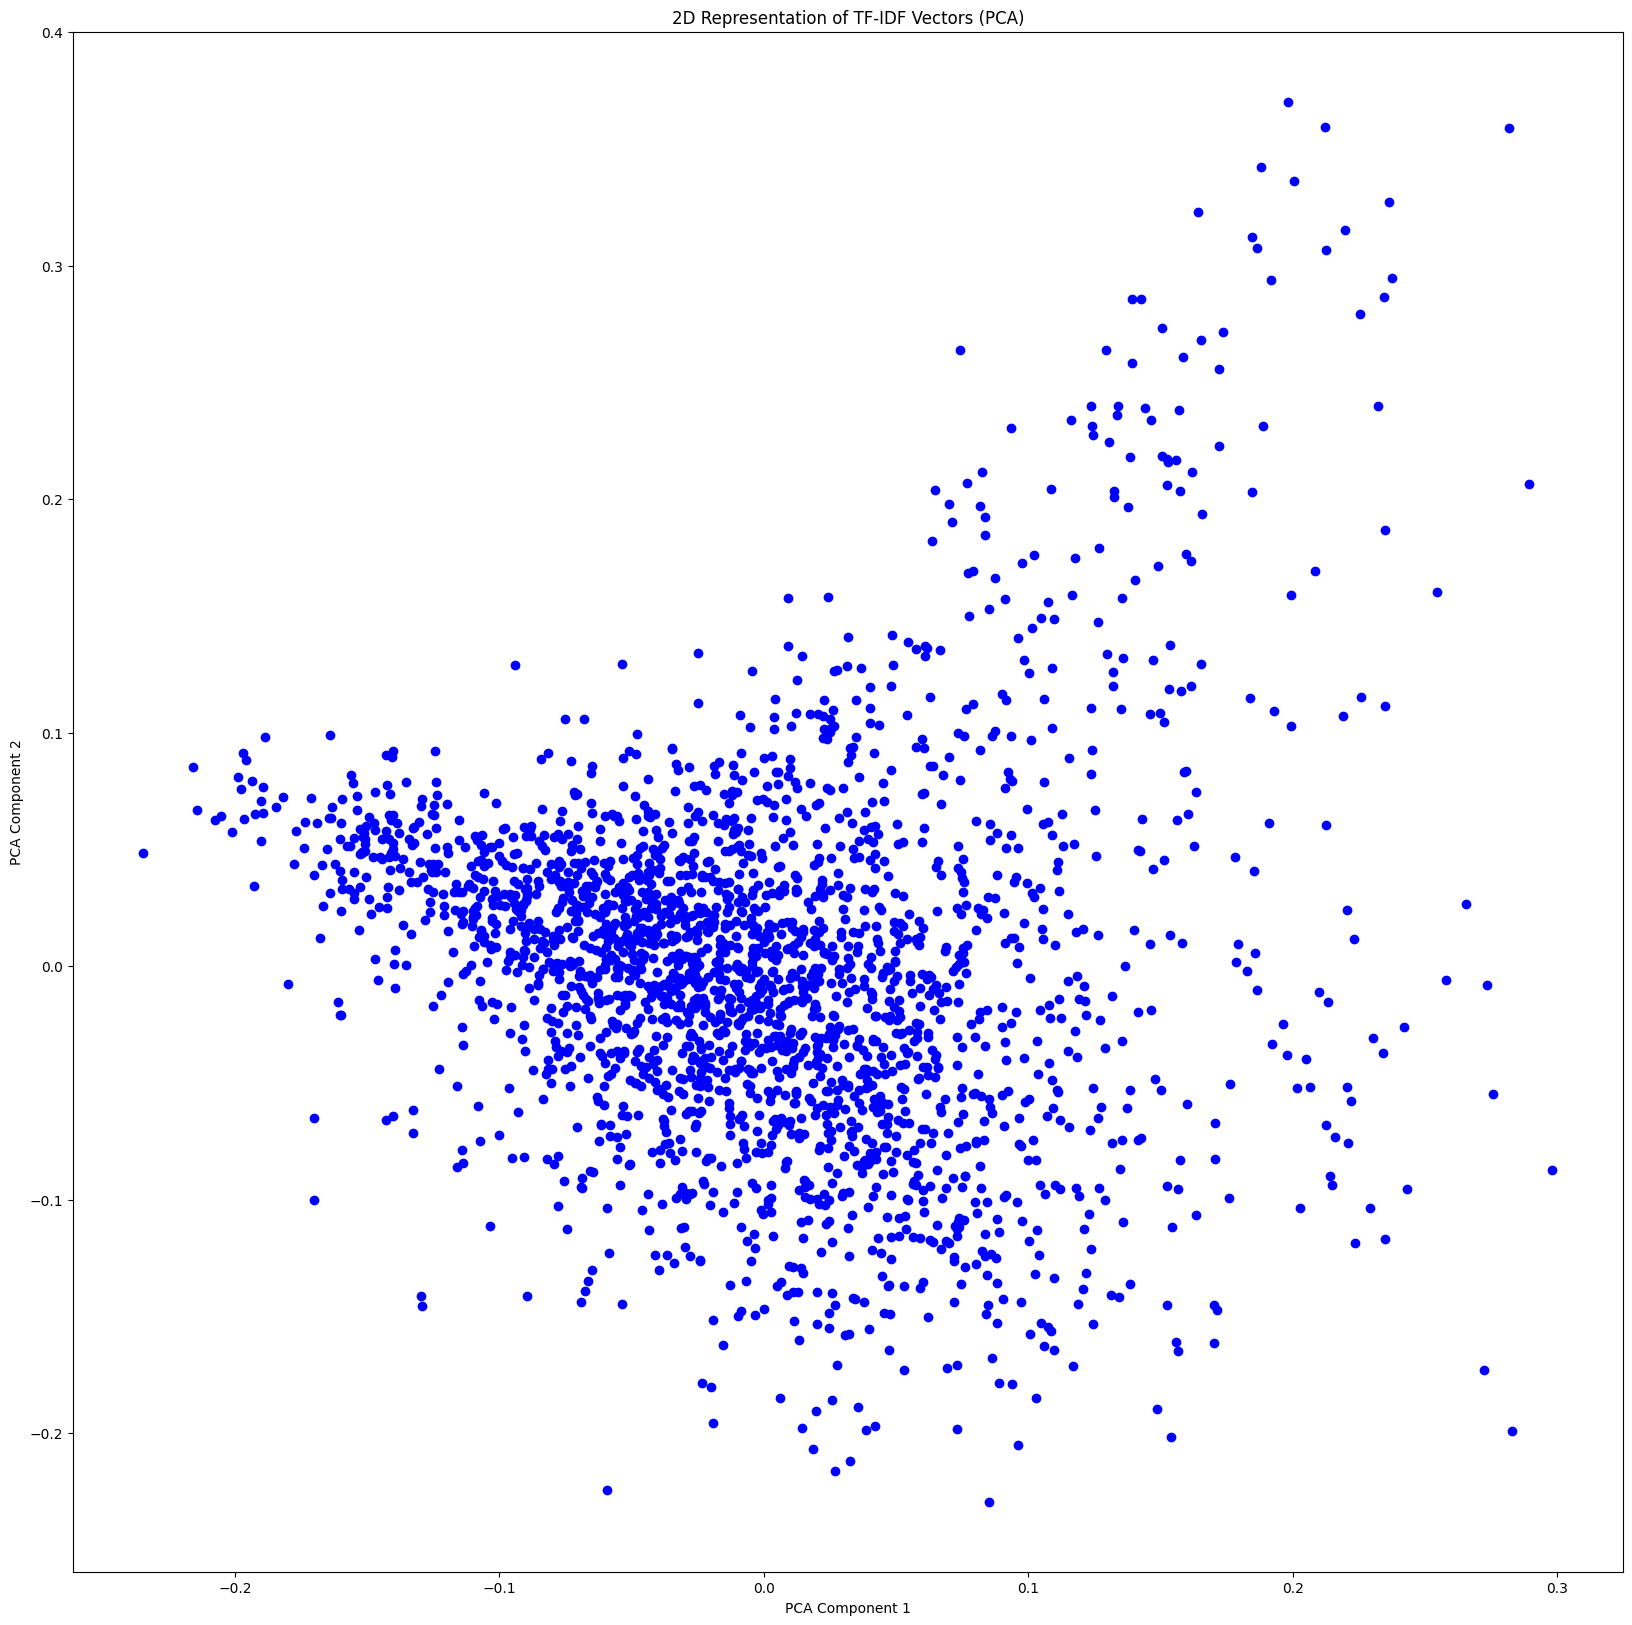

In [19]:
plt.figure(figsize = (20, 20))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], color='blue')

plt.title('2D Representation of TF-IDF Vectors (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Admin\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\Admin\anaconda3\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\Admin\anaconda3\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Admin\anaconda3\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


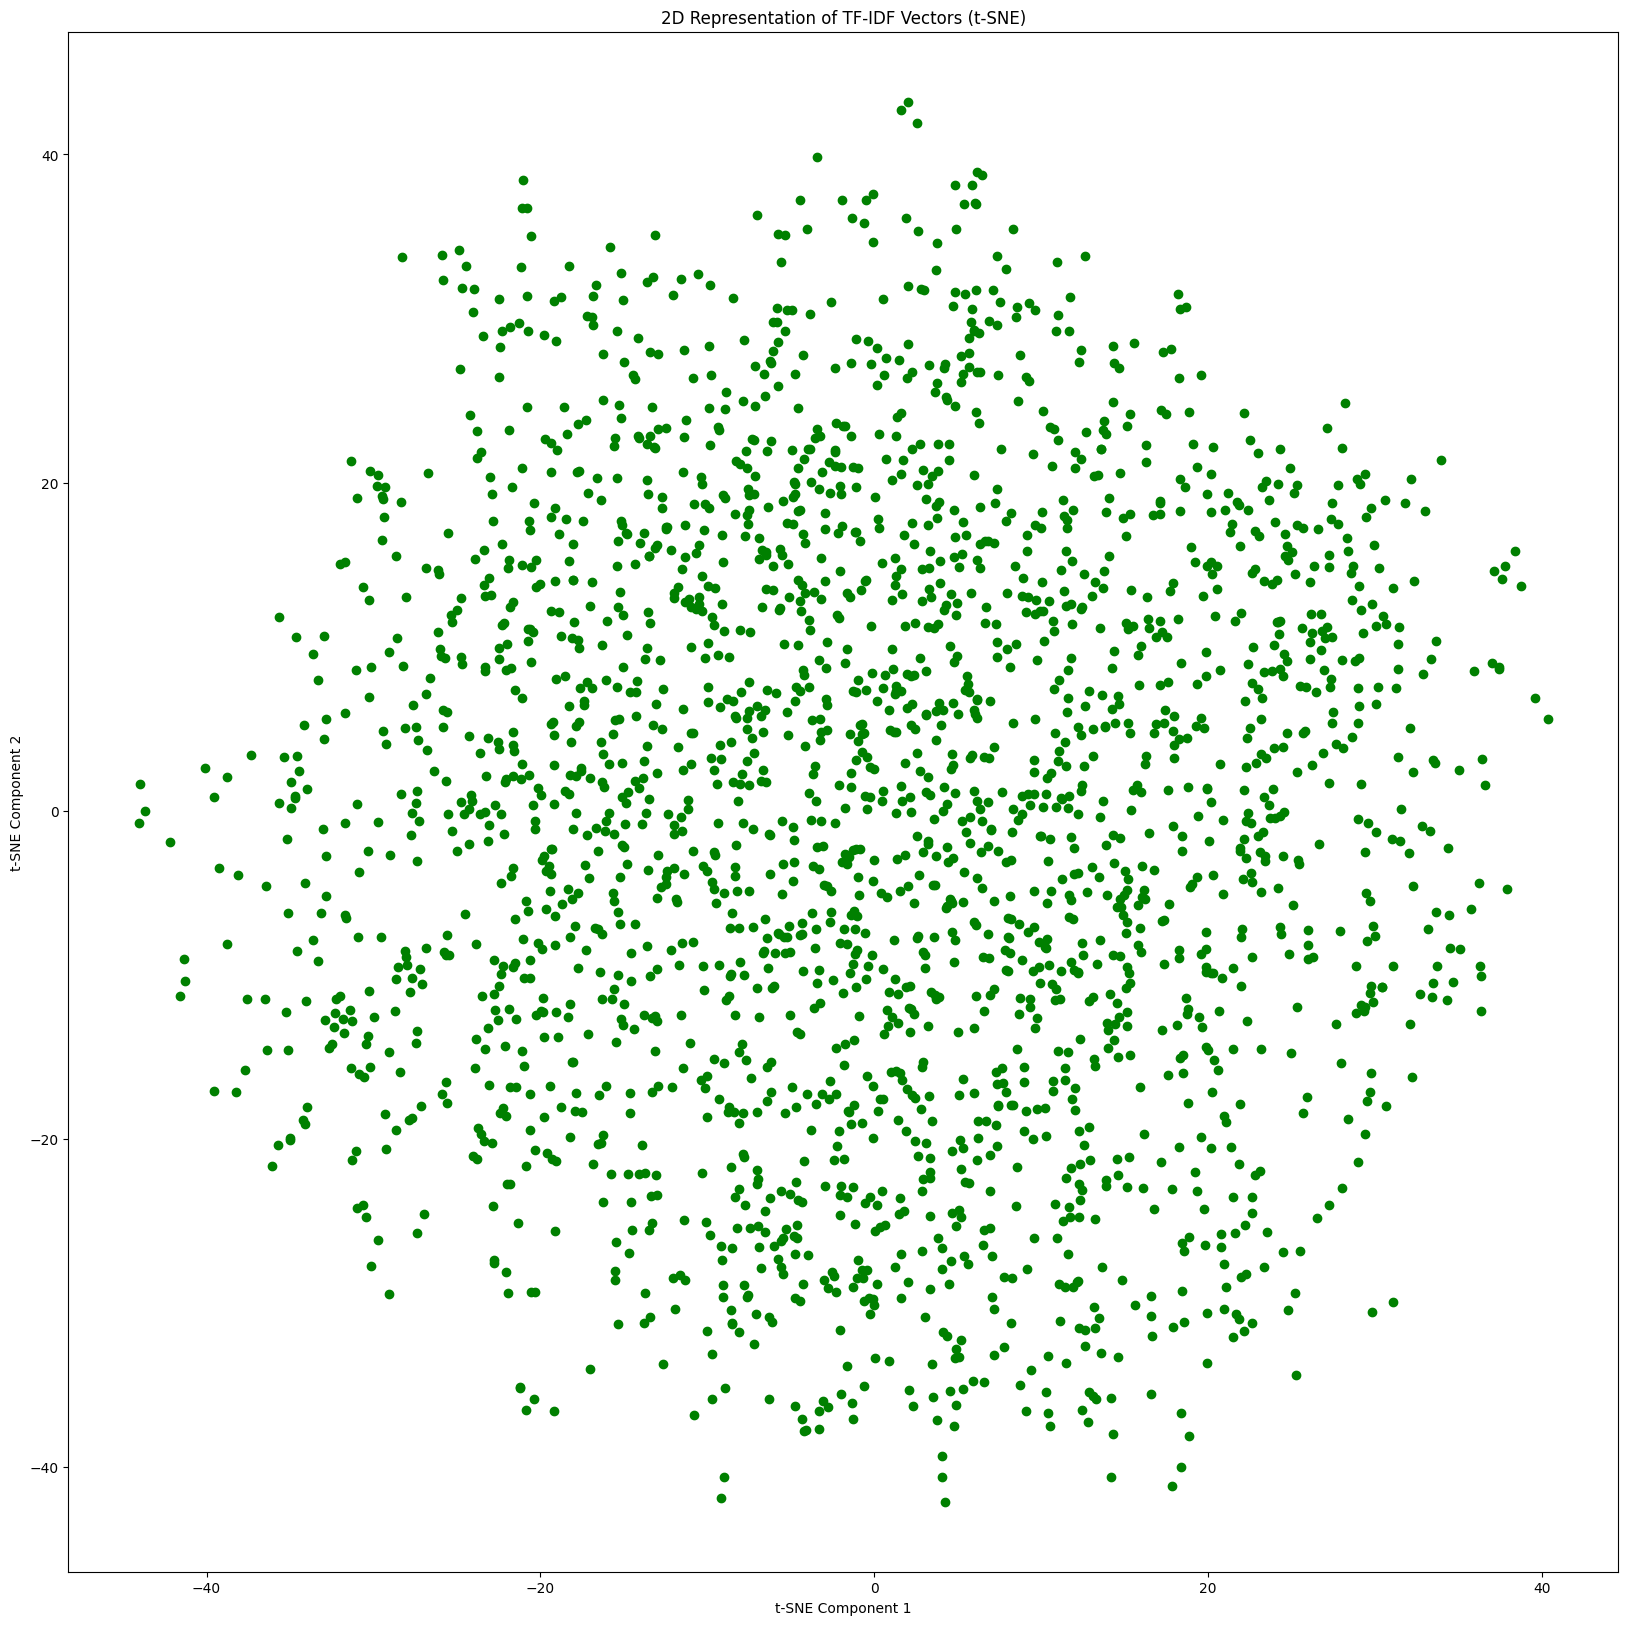

In [20]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=42)
reduced_data_tsne = tsne.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize = (20, 20))
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], color='green')

plt.title('2D Representation of TF-IDF Vectors (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

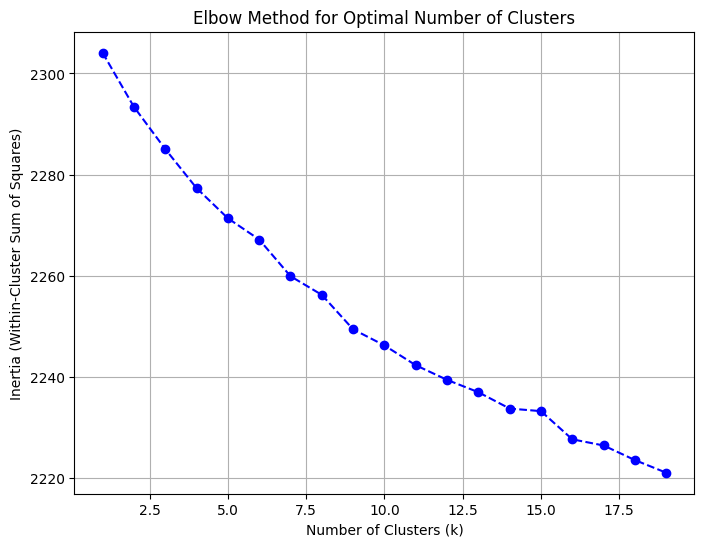

In [47]:
inertia = []
k_range = range(1, 20)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', color='b', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [21]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=7, random_state=42)

In [22]:
labels = kmeans.labels_
cluster_centers =  kmeans.cluster_centers_

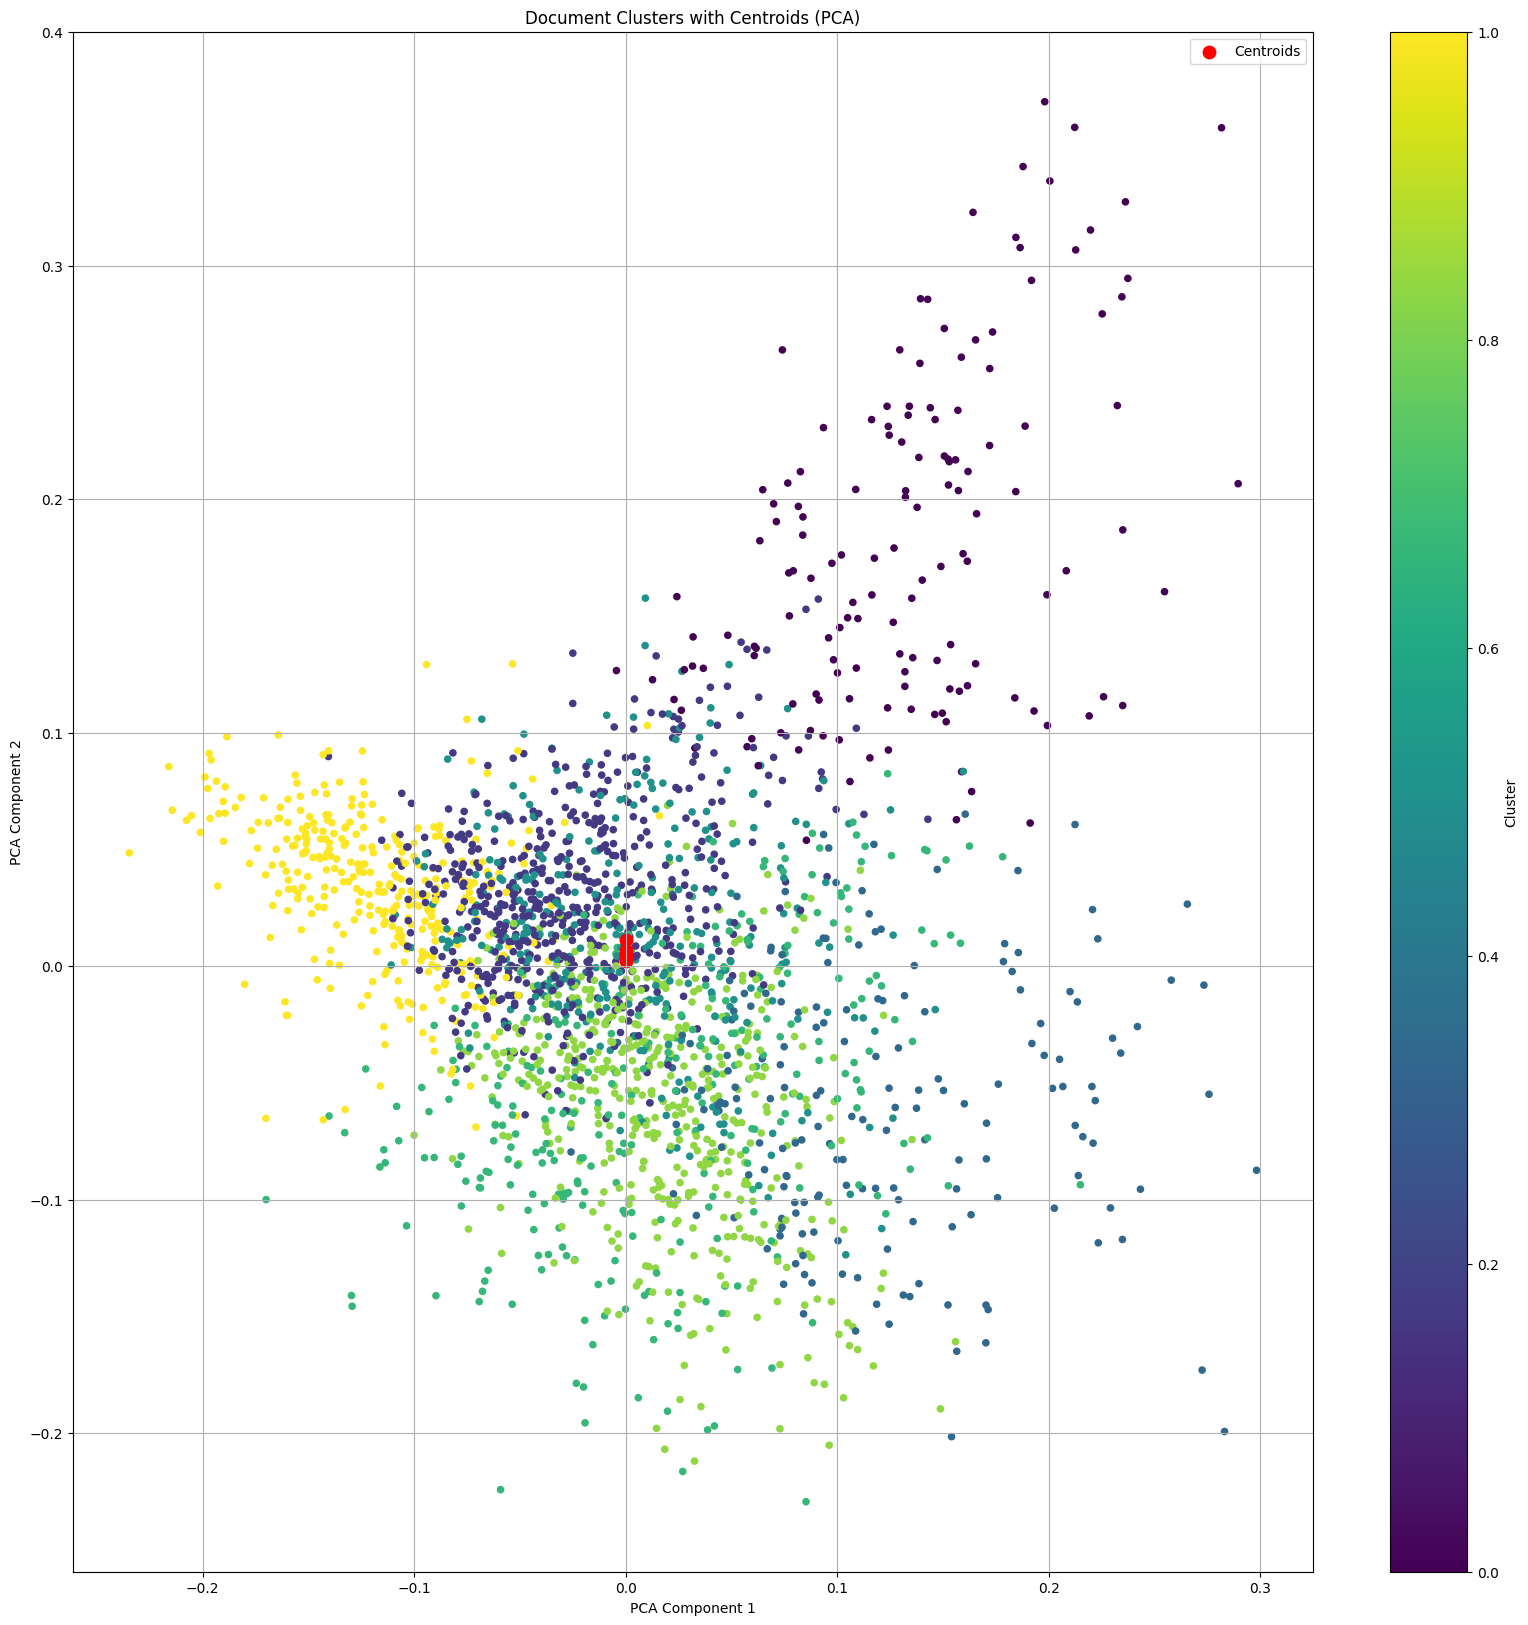

In [23]:
labels = kmeans.labels_
cluster_centers =  kmeans.cluster_centers_

plt.figure(figsize=(20,20))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis',s=20, marker='o')

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=80, label='Centroids')

plt.title('Document Clusters with Centroids (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.colorbar(label='Cluster')
plt.grid(True)

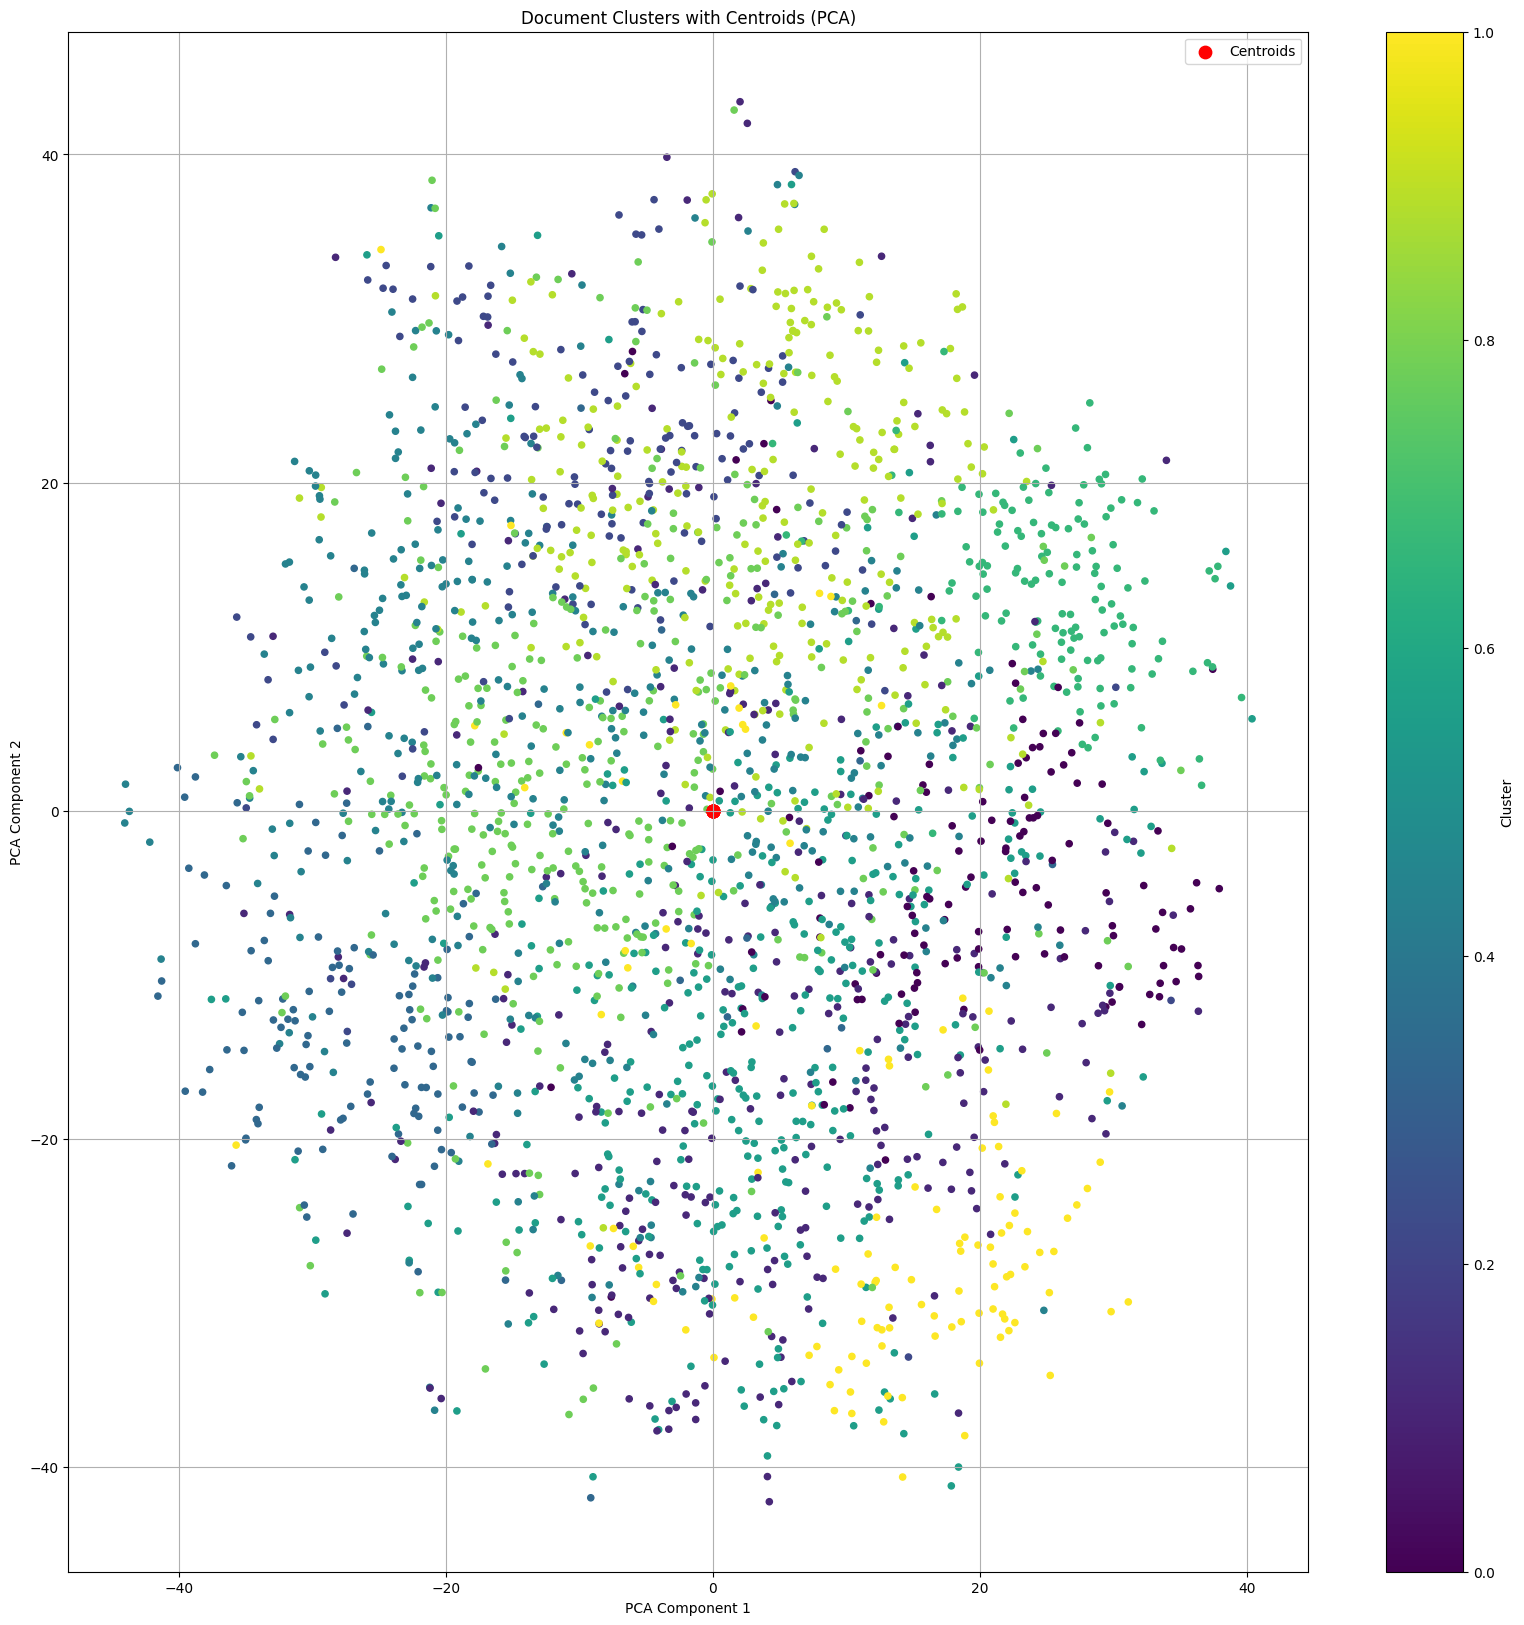

In [68]:
labels = kmeans.labels_
cluster_centers =  kmeans.cluster_centers_

plt.figure(figsize=(20,20))
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=labels, s=20, marker='o')

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=80, label='Centroids')

plt.title('Document Clusters with Centroids (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.colorbar(label='Cluster')
plt.grid(True)

In [181]:
n = 7
kmeans = KMeans(n_clusters=n, random_state=42, init='k-means++', n_init=3)
kmeans.fit(tfidf_matrix)

labels = kmeans.labels_
cluster_centers =  kmeans.cluster_centers_

C:\Users\Admin\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Admin\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\Admin\anaconda3\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\Admin\anaconda3\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Admin\anaconda3\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


In [182]:
df['label'] = labels
df['cleaned_data'] = cleaned_content

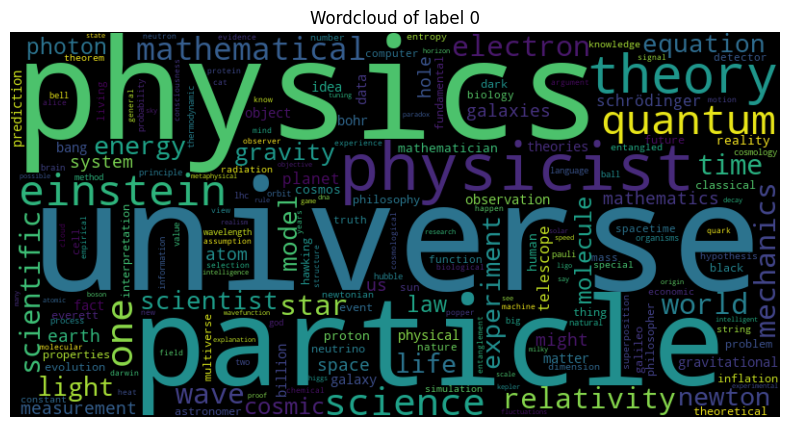

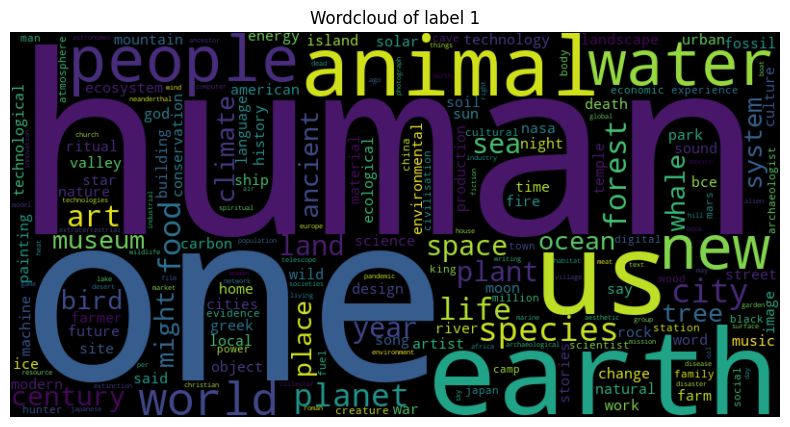

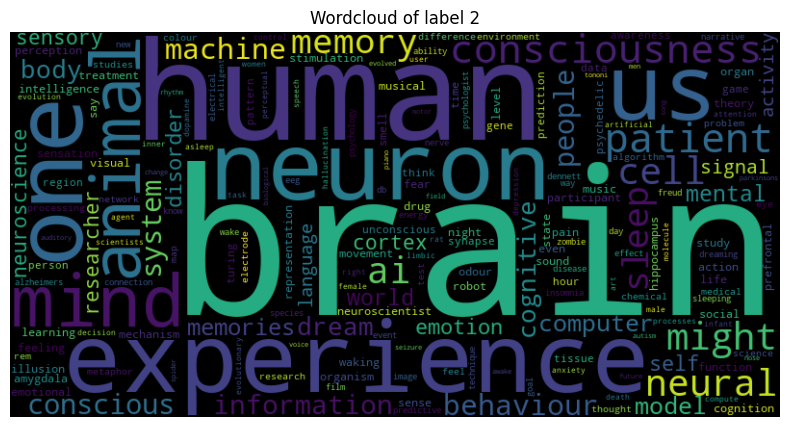

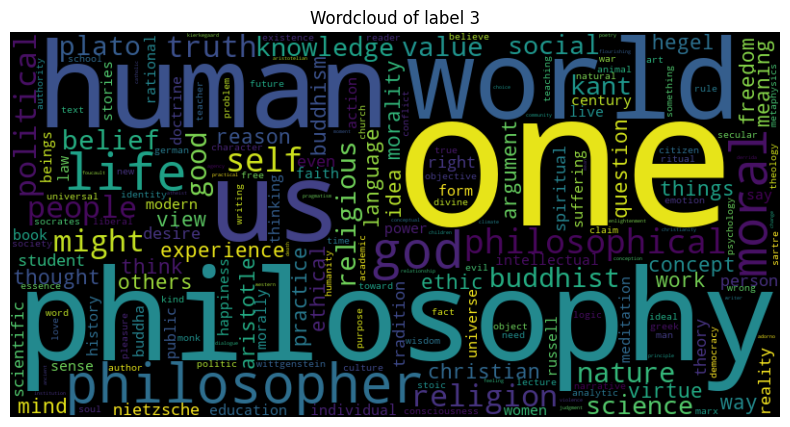

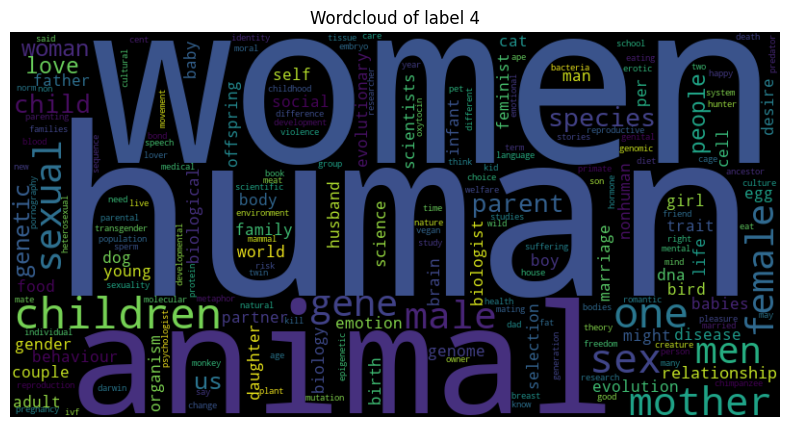

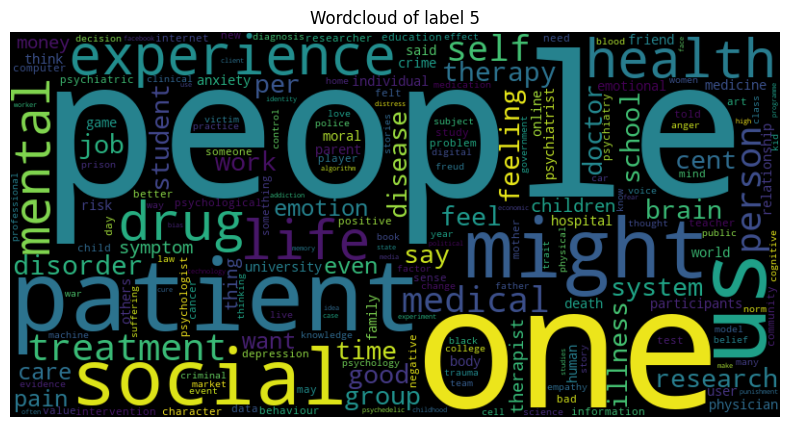

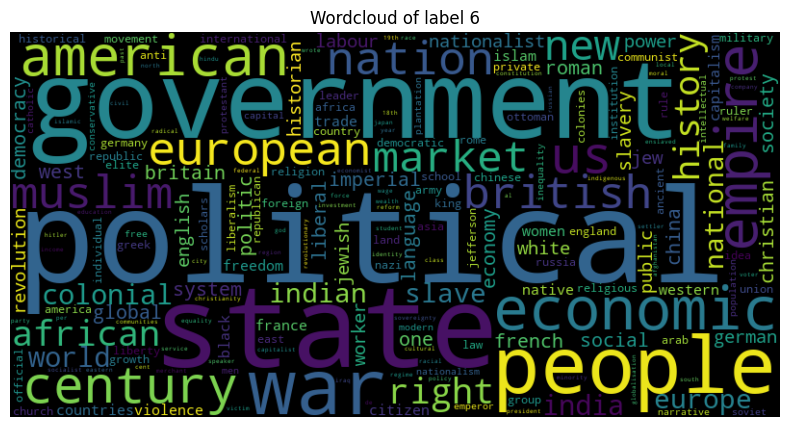

In [183]:
for cluster_label in range(7):
    words = []

    for i in df.loc[df['label'] == cluster_label, 'cleaned_data'].index:
        words.extend(tfidf_df.iloc[i].sort_values(ascending=False).head(50).index)

    wordcloud = WordCloud(
        width=800, 
        height=400, 
        colormap="viridis", 
        stopwords=None
    ).generate(' '.join(words))

    plt.figure(figsize=(10, 5))
    plt.title(f"Wordcloud of label {cluster_label}")
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off") 
    plt.show()

All the articles are can roughly grouped into 7 groups which are:

0. Physics and cosmology (space stuff)
1. Earth and biology (nature stuff)
2. Psychology and neuroscience/cognition (brain stuff)
3. Philosophy
4. Self, sex and relationships (sexy stuff)
5. health, medicine, and care (self care stuff)
6. Politics and society ( war stuff)

In [92]:
color_scale = [
    'rgb(255, 0, 0)',     # Bright Red
    'rgb(0, 0, 255)',     # Bright Blue
    'rgb(0, 255, 0)',     # Bright Green
    'rgb(255, 255, 0)',   # Yellow
    'rgb(255, 165, 0)',   # Orange
    'rgb(128, 0, 128)',   # Purple
#     'rgb(0, 255, 255)',   # Cyan
    'rgb(255, 20, 147)',  # Deep Pink
    'rgb(139, 69, 19)',   # Brown
    'rgb(0, 0, 0)',       # Black
    'rgb(192, 192, 192)'  # Silver (Light Gray)
]

cluster_colors = [color_scale[label] for label in df['label'].values]

scatter = go.Scatter3d(
    x=reduced_data[:, 0],  
    y=reduced_data[:, 1], 
    z=reduced_data[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=labels,      
        colorscale=cluster_colors, 
        opacity=1
    ),
    text=[str(label) for label in labels], 
    textposition="top center",           
    name='Data Points'
)

centroids = go.Scatter3d(
    x=cluster_centers[:, 0],  
    y=cluster_centers[:, 1],  
    z=cluster_centers[:, 2],  
    mode='markers',
    marker=dict(
        size=10,
        color='black',
        symbol='x',
    ),
    
    name='Centroids'
)

layout = go.Layout(
    title='Interactive 3D Clustering',
    scene=dict(
        xaxis_title='PCA Component 1',
        yaxis_title='PCA Component 2',
        zaxis_title='PCA Component 3'
    )
)

fig = go.Figure(data=[scatter, centroids], layout=layout)

fig.show()

1. There is a rough overlap between sexy stuff, brain stuff and self care stuff
2. Others are fairly seperated

In [17]:
pca = PCA(n_components=100)
pca_matrix = pca.fit_transform(tfidf_matrix.toarray())

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

tf_cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim_pca100 = cosine_similarity(pca_matrix, pca_matrix)

scaler = StandardScaler()
tfidf_matrix_scaled = scaler.fit_transform(tfidf_matrix.toarray())

pca_matrix_scaled = scaler.fit_transform(pca_matrix)

tf_cosine_sim_scaled = cosine_similarity(tfidf_matrix_scaled, tfidf_matrix_scaled)
cosine_sim_pca100_scaled = cosine_similarity(pca_matrix_scaled, pca_matrix_scaled)

In [19]:
def recommend_articles(article_id, cosine_sim, df, top_n=3):
    idx = df.index[df['index'] == article_id].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    article_indices = [i[0] for i in sim_scores]
    return df.iloc[article_indices]

In [22]:
df = df.reset_index()

In [99]:
n = df.sample().index[0]
df[df['index'] == n]
# n = 438

index                                                url  \
170    170  https://aeon.co/essays/how-digital-storytellin...   

                   title                                            content  \
170  Happily never after  In 1999, Adnan Syed, a teenager from Baltimore...   

                                                  tags       date year_month  
170  [Stories and literature, Biography and memoir,... 2015-05-04    2015-05

In [100]:
recommended_articles_tf = recommend_articles(article_id=n, cosine_sim=tf_cosine_sim, df=df, top_n=10)[['title', 'content', 'url']]
recommended_articles_pca = recommend_articles(article_id=n, cosine_sim=cosine_sim_pca100, df=df, top_n=10)[['title', 'content', 'url']]
recommended_articles_tf_scaled = recommend_articles(article_id=n, cosine_sim=tf_cosine_sim_scaled, df=df, top_n=10)[['title', 'content', 'url']]
recommended_articles_pca_scaled = recommend_articles(article_id=n, cosine_sim=cosine_sim_pca100_scaled, df=df, top_n=10)[['title', 'content', 'url']]

df[df['index'] == n]['url'].values[0]

'https://aeon.co/essays/how-digital-storytelling-revives-the-ancient-art-of-gossip'

In [101]:
recommended_articles_pca['url'].values

array(['https://aeon.co/essays/a-story-told-aloud-in-person-has-a-power-like-no-other',
       'https://aeon.co/essays/what-makes-the-sympathetic-plot-a-universal-story-type',
       'https://aeon.co/essays/a-surprise-story-is-a-self-exploding-confidence-game',
       'https://aeon.co/essays/let-s-ditch-the-dangerous-idea-that-life-is-a-story',
       'https://aeon.co/essays/how-books-can-sap-the-soul-and-poison-readers-with-ideas',
       'https://aeon.co/essays/once-upon-a-time-how-stories-change-hearts-and-brains',
       'https://aeon.co/essays/why-story-is-used-to-explain-symphonies-and-sport-matches-alike',
       'https://aeon.co/essays/my-daughter-says-bilbo-baggins-is-a-girl-who-am-i-to-argue',
       'https://aeon.co/essays/the-stories-of-oral-societies-arent-myths-theyre-records',
       'https://aeon.co/essays/how-to-tell-fact-from-fiction-in-fiction-and-other-forms-of-lies'],
      dtype=object)

In [102]:
recommended_articles_pca_scaled['url'].values

array(['https://aeon.co/essays/what-makes-the-sympathetic-plot-a-universal-story-type',
       'https://aeon.co/essays/a-story-told-aloud-in-person-has-a-power-like-no-other',
       'https://aeon.co/essays/a-surprise-story-is-a-self-exploding-confidence-game',
       'https://aeon.co/essays/how-books-can-sap-the-soul-and-poison-readers-with-ideas',
       'https://aeon.co/essays/let-s-ditch-the-dangerous-idea-that-life-is-a-story',
       'https://aeon.co/essays/once-upon-a-time-how-stories-change-hearts-and-brains',
       'https://aeon.co/essays/why-story-is-used-to-explain-symphonies-and-sport-matches-alike',
       'https://aeon.co/essays/my-daughter-says-bilbo-baggins-is-a-girl-who-am-i-to-argue',
       'https://aeon.co/essays/the-stories-of-oral-societies-arent-myths-theyre-records',
       'https://aeon.co/essays/economic-bubbles-are-irrational-but-we-can-understand-them'],
      dtype=object)

In [103]:
recommended_articles_tf['url'].values

array(['https://aeon.co/essays/why-story-is-used-to-explain-symphonies-and-sport-matches-alike',
       'https://aeon.co/essays/let-s-ditch-the-dangerous-idea-that-life-is-a-story',
       'https://aeon.co/essays/how-books-can-sap-the-soul-and-poison-readers-with-ideas',
       'https://aeon.co/essays/a-story-told-aloud-in-person-has-a-power-like-no-other',
       'https://aeon.co/essays/a-surprise-story-is-a-self-exploding-confidence-game',
       'https://aeon.co/essays/where-do-children-s-earliest-memories-go',
       'https://aeon.co/essays/once-upon-a-time-how-stories-change-hearts-and-brains',
       'https://aeon.co/essays/the-villainous-self-and-the-uses-of-redemption',
       'https://aeon.co/essays/would-you-purge-bad-memories-from-your-brain-if-you-could',
       'https://aeon.co/essays/why-doesn-t-physics-help-us-to-understand-the-flow-of-time'],
      dtype=object)

In [144]:
vectorizer = TfidfVectorizer()
tfidf_matrix  = vectorizer.fit_transform(cleaned_content)

In [145]:
def prompt_recommend(prompt, df, top_n=5):
    prompt = expand_words(prompt)
    prompt = clean_data(prompt)
    
    user_prompt_vector = vectorizer.transform([prompt])
    
    sim = cosine_similarity(user_prompt_vector, tfidf_matrix).flatten() 
    
    top_indices = sim.argsort()[-top_n:][::-1]  
    
    recommended_articles = df.iloc[top_indices]
    return recommended_articles

In [178]:
prompt = "palau"
prompt_recommend(prompt, df, top_n=20)

index                                                url  \
2099   2099  https://aeon.co/essays/why-it-s-time-to-put-an...   
819     819  https://aeon.co/essays/why-do-we-set-such-stor...   
810     810  https://aeon.co/essays/on-susan-stebbing-and-t...   
808     808  https://aeon.co/essays/how-books-can-sap-the-s...   
807     807  https://aeon.co/essays/corruption-has-shaped-h...   
806     806  https://aeon.co/essays/what-can-aristotle-teac...   
805     805  https://aeon.co/essays/do-dolphins-really-shar...   
804     804  https://aeon.co/essays/can-computers-think-no-...   
803     803  https://aeon.co/essays/what-is-life-like-for-d...   
802     802  https://aeon.co/essays/the-more-we-label-every...   
2415   2415  https://aeon.co/essays/as-real-as-it-ever-gets...   
801     801  https://aeon.co/essays/does-the-flow-of-heat-h...   
800     800  https://aeon.co/essays/how-textiles-repeatedly...   
799     799  https://aeon.co/essays/the-way-music-moves-us-...   
798     798  https://aeon.co/essays/how-culture-works-with-...   
797     797  https://aeon.co/essays/can-a-martyrs-death-be-...   
796     796  https://aeon.co/essays/how-scots-freethinkers-...   
795     795  https://aeon.co/essays/pluck-and-hard-work-or-...   
794     794  https://aeon.co/essays/how-changing-the-metaph...   
809     809  https://aeon.co/essays/why-is-it-so-hard-to-sa...   

                              title  \
2099         Through a glass, sadly   
819           Dark side of the Moon   
810           Pause. Reflect. Think   
808                      Dark books   
807               The Midas Disease   
806       Why read Aristotle today?   
805                    Keep smiling   
804        Rage against the machine   
803             Crippling injustice   
802          Each scar is different   
2415  The stories of Daniel Dennett   
801          Why trees don’t ungrow   
800               Losing the thread   
799           Getting in the groove   
798               Cognitive gadgets   
797                  Wielding death   
796       Conscientious unbelievers   
795               Pluck versus luck   
794        Metaphors make the world   
809                    Outer limits   

                                                content  \
2099  The deeply religious 19th-century English natu...   
819   When I was seven years old, my Baptist grandpa...   
810   ‘There is an urgent need today for the citizen...   
808   Reading novels is good for you. This is the cu...   
807   In Kandahar, Afghanistan, in late 2001, I watc...   
806   In the Western world, only since the mid-18th ...   
805   One evening in the summer of 2004, I was in a ...   
804   Computers do not actually do anything. They do...   
803   Willy hated dirty things. Dusty cans of Coke i...   
802   At the beginning of the First World War, my gr...   
2415  The late Daniel C Dennett (1942-2024) was a ma...   
801   Living things are so impressive that they have...   
800   In February 1939, Vogue ran a major feature on...   
799   The 55 Bar in Greenwich Village, with its bulg...   
798   Bookshops are wonderful places – and not all t...   
797   An octogenarian Christian bishop is condemned ...   
796   On the morning of Saturday 3 June 1843, the Ed...   
795   Occupants of the American meritocracy are accu...   
794   If Ralph Waldo Emerson was right that ‘languag...   
809   Any time we embark upon a journey, be it a mor...   

                                                   tags       date year_month  
2099  [History of science, Oceans and water, The env... 2015-11-30    2015-11  
819            [Cosmology, Religion, Space exploration] 2013-11-15    2013-11  
810          [Thinkers and theories, Education, Ethics] 2021-02-11    2021-02  
808   [Stories and literature, Language and linguist... 2016-01-07    2016-01  
807   [Ethics, Economic history, Human rights and ju... 2022-03-31    2022-03  
806   [Meaning and the good life, Ethics, Thinkers a... 2018-05-29    2018-05  

In [185]:
df[df['label'] == 0]

index                                                url  \
1         1  https://aeon.co/essays/why-is-simplicity-so-un...   
4         4  https://aeon.co/essays/why-should-science-have...   
7         7  https://aeon.co/essays/a-new-field-theory-reve...   
28       28  https://aeon.co/essays/a-brief-history-of-step...   
29       29  https://aeon.co/essays/how-did-albert-einstein...   
...     ...                                                ...   
2345   2345  https://aeon.co/essays/all-scientific-models-a...   
2373   2373  https://aeon.co/essays/how-economists-rode-mat...   
2385   2385  https://aeon.co/essays/science-needs-the-freed...   
2396   2396  https://aeon.co/essays/shut-up-and-calculate-d...   
2407   2407  https://aeon.co/essays/how-many-dimensions-are...   

                            title  \
1            Why simplicity works   
4                  Who knows what   
7          Elusive but everywhere   
28            His radiant formula   
29            Cognitive celebrity   
...                           ...   
2345                A model world   
2373            The new astrology   
2385               Paradigms lost   
2396  Calculate but don’t shut up   
2407           Radical dimensions   

                                                content  \
1     It is May 1964 and, on a low hillside in New J...   
4     Whenever we try to make an inventory of humank...   
7     Why do rocks fall? Before Isaac Newton introdu...   
28    This was an equation to die for. That became c...   
29    Before he died, Albert Einstein requested that...   
...                                                 ...   
2345  Here is a simple recipe for doing science. Fin...   
2373  Since the 2008 financial crisis, colleges and ...   
2385  Coming from a scientist, this sounds smug, but...   
2396  Physics is important. We rely on it to provide...   
2407  Writing away at my desk, I reach my hand up to...   

                                                   tags       date year_month  \
1           [Physics, Evolution, Philosophy of science] 2021-10-11    2021-10   
4     [Philosophy of science, History of ideas, Know... 2012-10-08    2012-10   
7             [Philosophy of science, Biology, Physics] 2024-11-04    2024-11   
28             [History of science, Astronomy, Physics] 2024-06-18    2024-06   
29    [Cognition and intelligence, History of scienc... 2014-07-22    2014-07   
...                                                 ...        ...        ...   
2345  [Computing and artificial intelligence, Knowle... 2013-12-16    2013-12   
2373       [Economics, History of science, Mathematics] 2016-04-04    2016-04   
2385  [Biology, History of science, Philosophy of sc... 2015-10-27    2015-10   
2396  [History of science, Philosophy of science, Qu... 2021-12-06    2021-12   
2407                  [Physics, Cosmology, Mathematics] 2018-01-10    2018-01   

      label                                       cleaned_data  
1         0  may 1964 low hillside new jersey physicists ro...  
4         0  whenever try make inventory humankinds store k...  
7         0  rocks fall isaac newton introduced revolutiona...  
28        0  equation die became clear turned stephen hawki...  
29        0  died albert einstein requested whole body crem...  
...     ...                                                ...  
2345      0  simple recipe science find plausible theory bi...  
2373      0  since 2008 financial crisis colleges universit...  
2385      0  coming scientist sounds smug science one human...  
2396      0  physics important rely provide us valid concep...  
2407      0  writing away desk reach hand turn lamp open dr...  

[145 rows x 9 columns]